Problem Statement : Customer personality analysis for the given dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Data collection
df = pd.read_excel("marketing_campaign.xlsx")
df1 = df.copy()
df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


Understanding Marketing Campaign Dataset

In [13]:
# Check the dimensions of the dataset
print(df1.shape)

(2240, 29)


In [14]:
# Summary statistics of numerical columns
print(df1.describe())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000  

 Handle Missing Values

Checking for null values


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

Checking for duplicate values

In [4]:
df1.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

EDA:Exploratory Data Analysis

Univariate Analysis

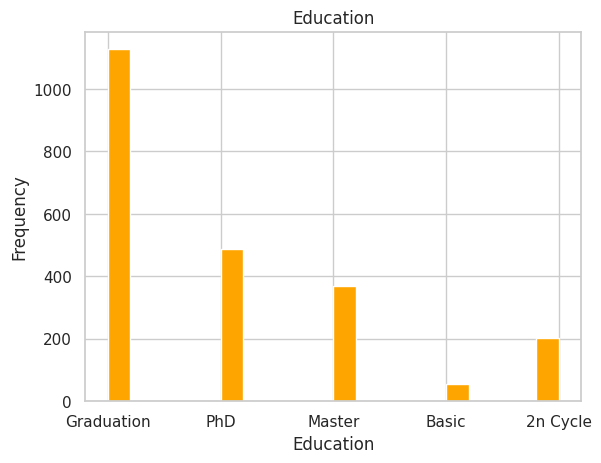

In [18]:
plt.hist(df['Education'], bins=20,facecolor='Orange')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('Education')
plt.show()

2.Bar chart

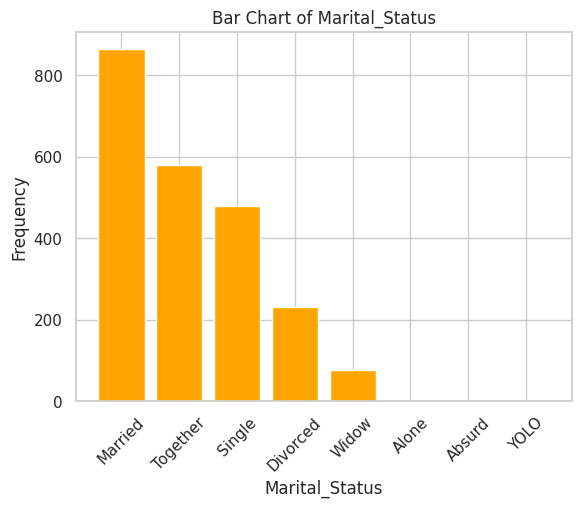

In [20]:
plt.bar(df['Marital_Status'].value_counts().index, df['Marital_Status'].value_counts().values,facecolor='Orange')
plt.xlabel('Marital_Status')
plt.ylabel('Frequency')
plt.title('Bar Chart of Marital_Status')
plt.xticks(rotation=45)
plt.show()

Bivariate Analysis

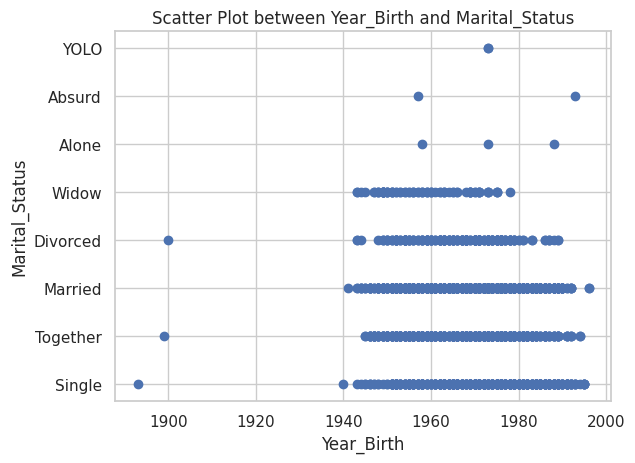

In [23]:
plt.scatter(df['Year_Birth'], df['Marital_Status'])
plt.xlabel('Year_Birth')
plt.ylabel('Marital_Status')
plt.title('Scatter Plot between Year_Birth and Marital_Status')
plt.show()

Box plot to compare a numerical variable across categories

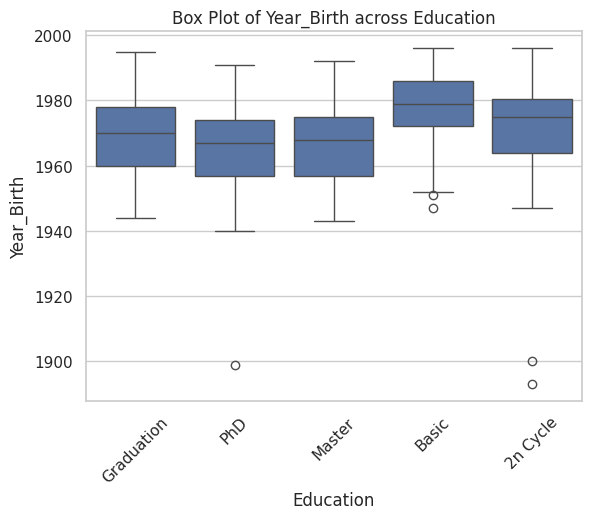

In [26]:
sns.boxplot(x='Education', y='Year_Birth', data=df)
plt.xlabel('Education')
plt.ylabel('Year_Birth')
plt.title('Box Plot of Year_Birth across Education')
plt.xticks(rotation=45)
plt.show()

Multivariate Analysis

<ipython-input-30-28ee6d9e2ba6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1[['Income','Education','Marital_Status','MntMeatProducts','Year_Birth','MntWines','NumWebVisitsMonth','Recency']].corr(), annot=True)


<Axes: >

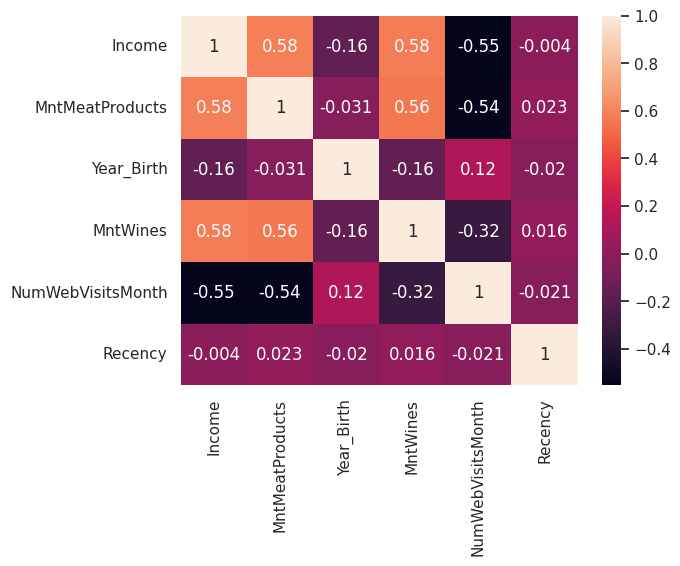

In [30]:
sns.heatmap(df1[['Income','Education','Marital_Status','MntMeatProducts','Year_Birth','MntWines','NumWebVisitsMonth','Recency']].corr(), annot=True)
#sns.heatmap(df1.isnull())

Text(0.5, 1.0, 'Income')

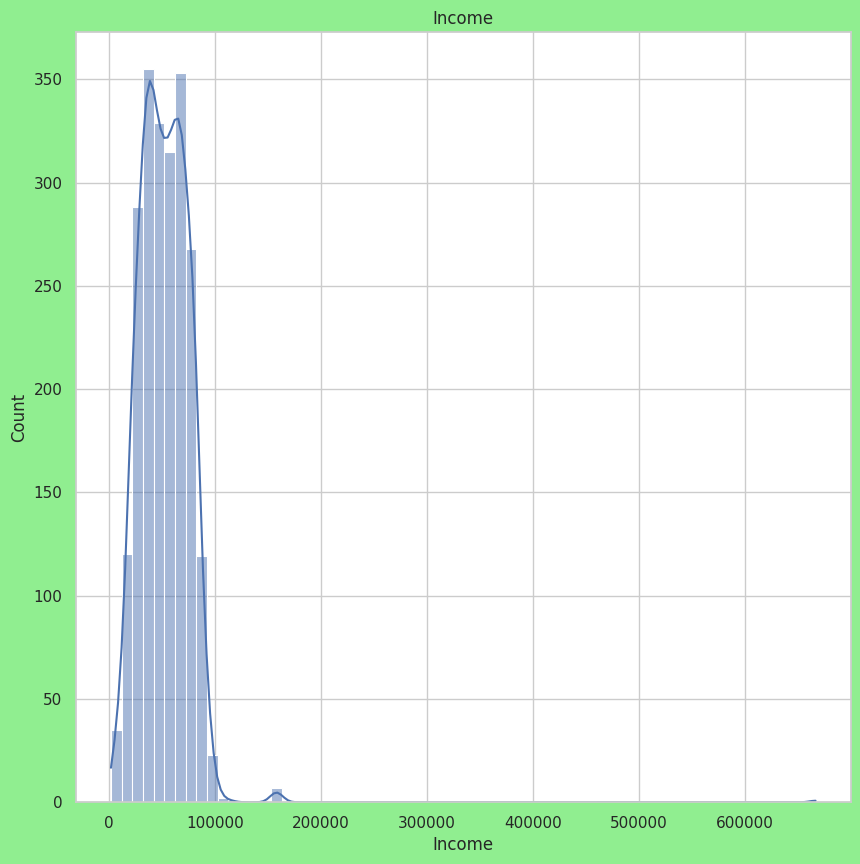

In [5]:
plt.figure(figsize=(10,10), facecolor='lightgreen')
sns.set(style='whitegrid')
ax = sns.histplot(data=df1, x='Income', binwidth=10000, kde=True)
ax.set_title('Income')

The income graph shows that the majority of the clients have incomes between 300,000 to 800,000

<ipython-input-6-9e7f330ec059>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df1, x='Education', saturation=1, alpha=0.9, palette='rocket', order=df1['Education'].value_counts().index)


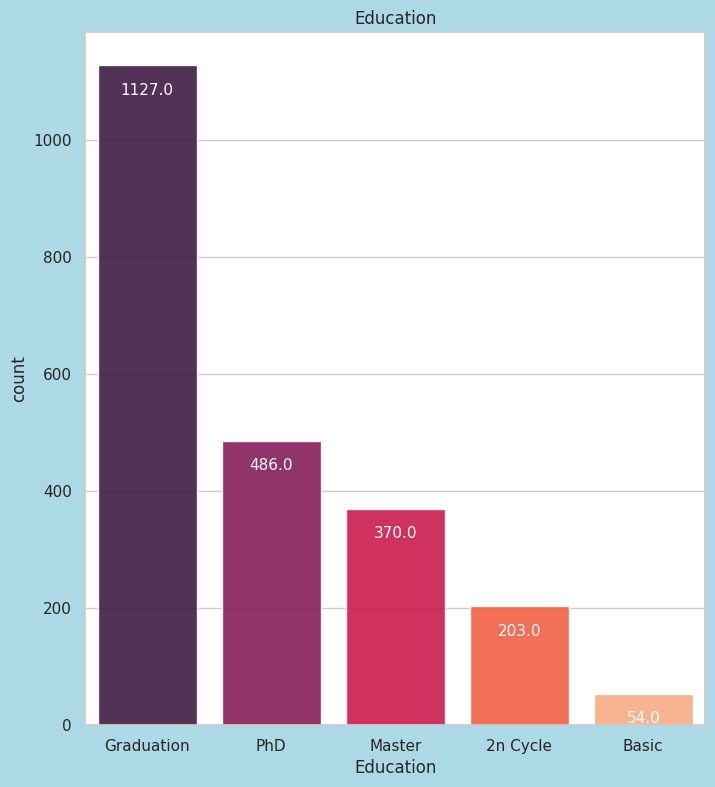

In [6]:
plt.figure(figsize=(8, 9), facecolor='lightblue')
sns.set(style='whitegrid')
ax = sns.countplot(data=df1, x='Education', saturation=1, alpha=0.9, palette='rocket', order=df1['Education'].value_counts().index)
ax.set_title('Education')
for p in ax.patches:
 ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=11)
plt.show()

The Education graph shows that the majority of the clients are Graduate.


<ipython-input-7-b3c2e08c5e64>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df1, x='Marital_Status', saturation=1, alpha=0.9, palette='rocket', order=df1['Marital_Status'].value_counts().index)


Text(0, 5, '2')

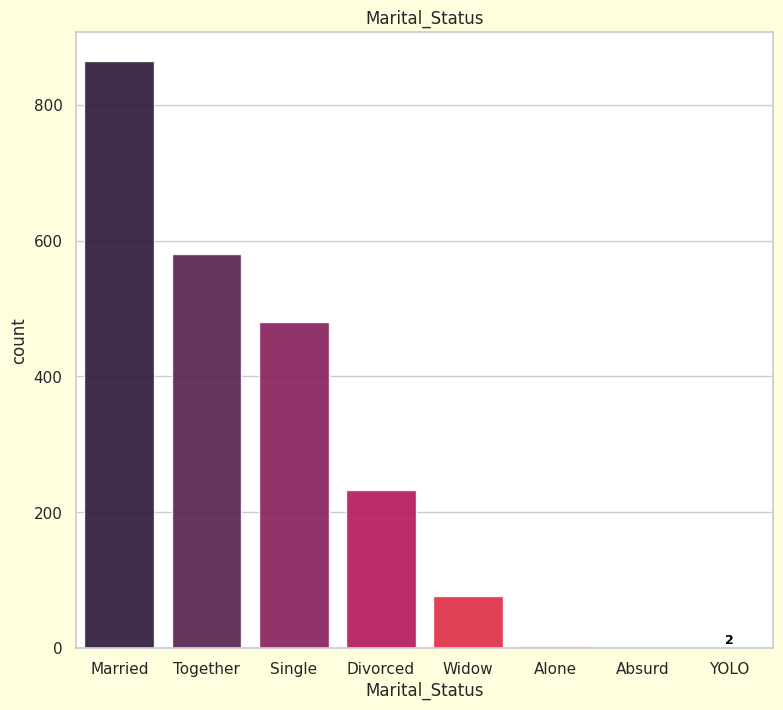

In [7]:
plt.figure(figsize=(9, 8), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=df1, x='Marital_Status', saturation=1, alpha=0.9, palette='rocket', order=df1['Marital_Status'].value_counts().index)
ax.set_title('Marital_Status')
for p in ax.patches:
 number = '{}'.format(p.get_height().astype('int64'))
ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
xytext=(0,5), textcoords='offset points', color='black', fontweight='semibold', fontsize=9)

The Marital status graph shows that the majority of the clients are Married.

Text(-49, 0, '680816')

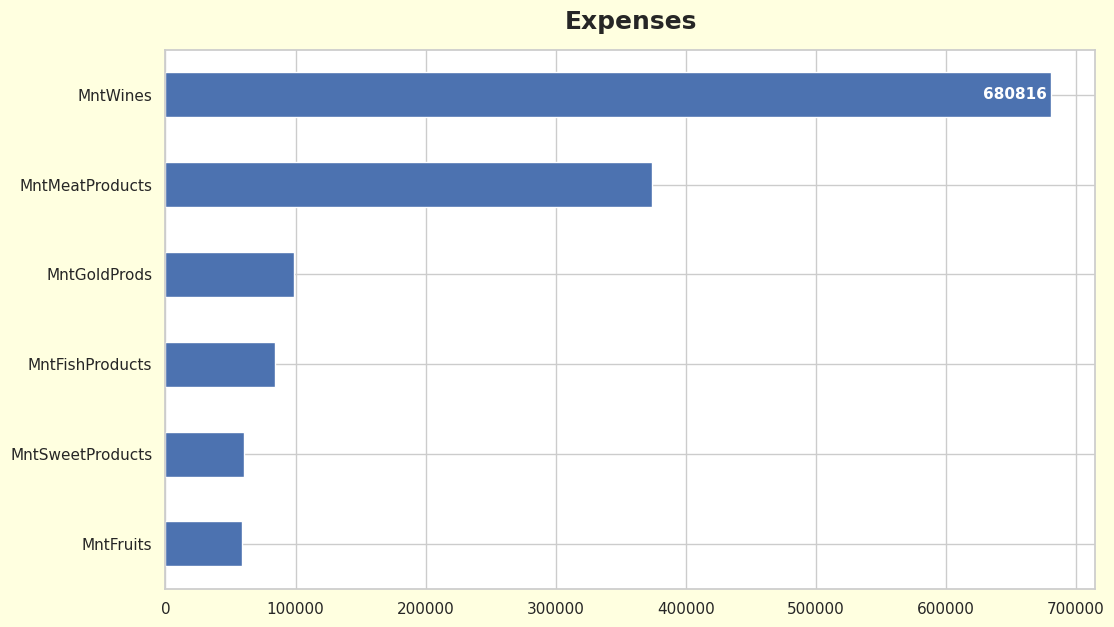

In [8]:
plt.figure(figsize=(12,7), facecolor='lightyellow')
ax = df1[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Expenses', pad=15, fontsize=18, fontweight='semibold')
rects = ax.patches
for rect in rects:
 x_value = rect.get_width()
 y_value = rect.get_y() + rect.get_height() / 2
plt.annotate('{}'.format(x_value), (x_value, y_value), xytext=(-49, 0),
textcoords='offset points', va='center', ha='left', color = 'white', fontsize=11, fontweight='semibold')

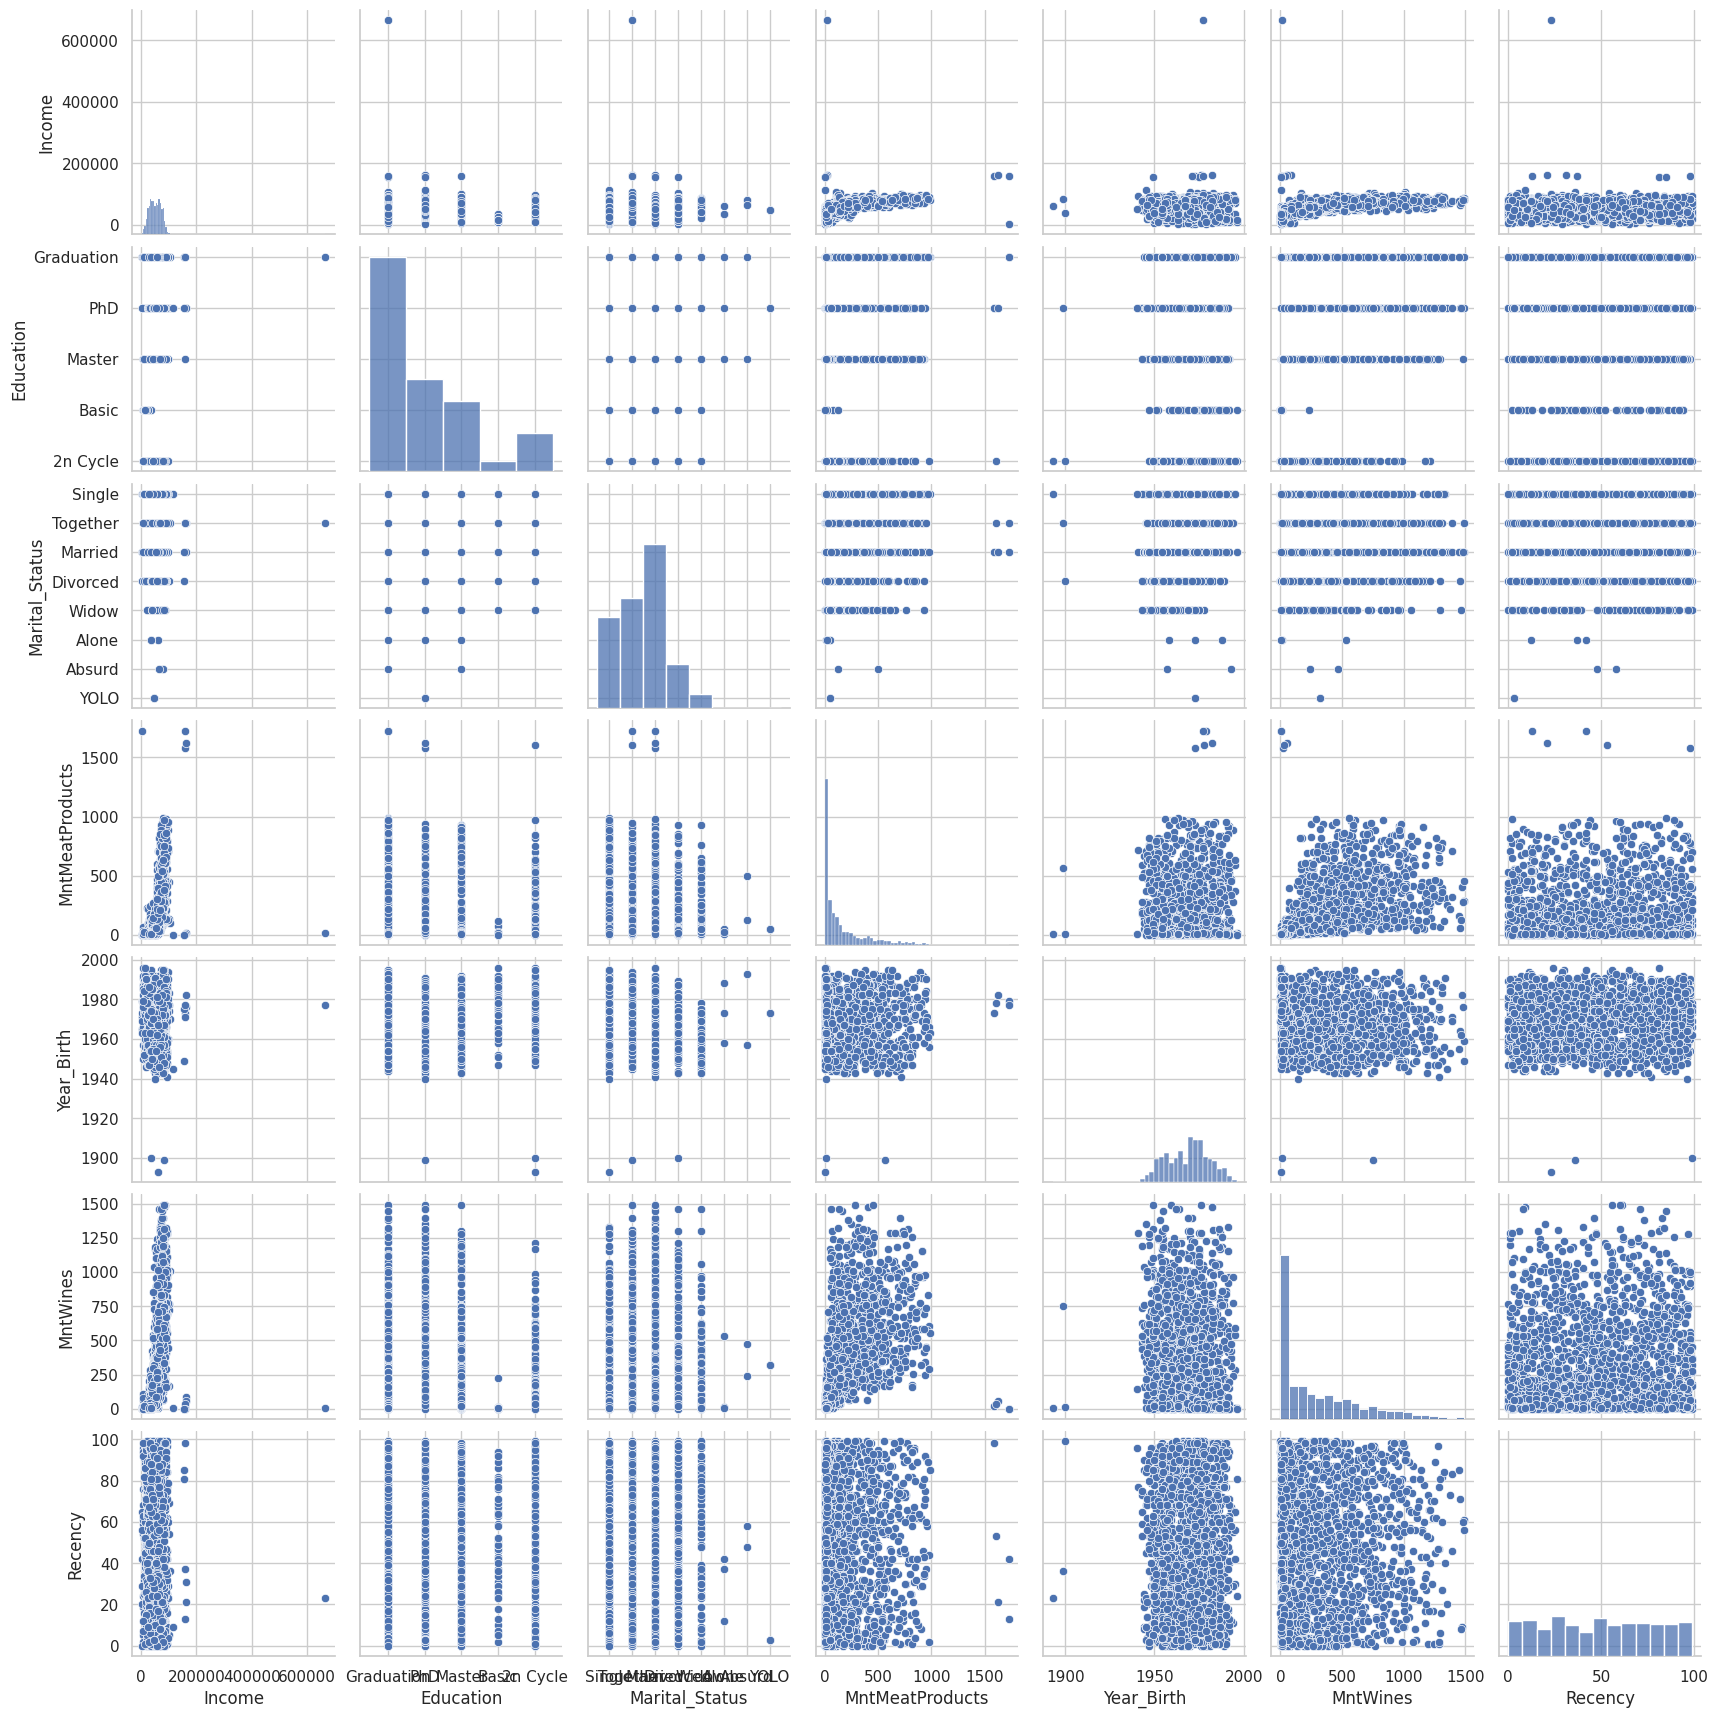

In [10]:
#sns.pairplot(df1)
sns.pairplot(
    df1,
    vars=['Income','Education','Marital_Status','MntMeatProducts','Year_Birth','MntWines','Recency']
)